# Modeling Your Data - Lab

## Introduction 

In this lab you'll perform a full linear regression analysis on the data. You'll implement the process demonstrated in the previous lesson, taking a stepwise approach to analyze and improve the model along the way.

## Objectives
You will be able to:

* Perform a full linear regression with iterations based on p-value of features and other parameters
* Create visualizations to better understand the distributions of variables in a dataset
* Determine whether or not the assumptions for linear regression hold true for this example

## Build an Initial Regression Model

To start, perform a train-test split and create an initial regression model to model the `list_price` using all of your available features.

> **Note:** In order to write the model you'll have to do some tedious manipulation of your column names. Statsmodels will not allow you to have spaces, apostrophe or arithmetic symbols (+) in your column names. Preview them and refine them as you go.  
**If you receive an error such as "PatsyError: error tokenizing input (maybe an unclosed string?)", then you need to further preprocess your column names.**

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_style('darkgrid')

from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
import scipy.stats as stats
from sklearn.model_selection import train_test_split


In [37]:
# Import the dataset 'Lego_dataset_cleaned.csv'
df = pd.read_csv('Lego_dataset_cleaned.csv')

In [38]:
# Your code here - Manipulate column names
def replace_invalid_chars(x):
    """
    Takes a string
    Returns a string with invalid characters removed.
    """
    
    invalid_chars=' +\''
    for char in invalid_chars:
        x = x.replace(char, '_')

    return x

df.columns = [replace_invalid_chars(x) for x in df.columns]

In [39]:
df.columns

Index(['piece_count', 'list_price', 'num_reviews', 'play_star_rating',
       'star_rating', 'val_star_rating', 'ages_10_', 'ages_10-14',
       'ages_10-16', 'ages_10-21',
       ...
       'country_NZ', 'country_PL', 'country_PT', 'country_US',
       'review_difficulty_Average', 'review_difficulty_Challenging',
       'review_difficulty_Easy', 'review_difficulty_Very_Challenging',
       'review_difficulty_Very_Easy', 'review_difficulty_unknown'],
      dtype='object', length=103)

In [40]:
# Your code here - Define the target and predictors
X = df.drop('list_price', axis=1)
y = df['list_price']

In [41]:
# Your code here - Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [42]:
# Your code here - Fit the actual model
X_train = sm.add_constant(X_train)
model = sm.OLS(y_train,X_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             list_price   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     545.5
Date:                Mon, 04 Jan 2021   Prob (F-statistic):               0.00
Time:                        18:35:32   Log-Likelihood:                -40612.
No. Observations:                8152   AIC:                         8.141e+04
Df Residuals:                    8057   BIC:                         8.208e+04
Df Model:                          94                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
const                                               64.0761      1.914     33.481      0.000      60.325      67.828
piece_count                                         76.4721      0.893     85.597      0.000      74.721      78.223
num_reviews                                          6.5330      0.682      9.584      0.000       5.197       7.869
play_star_rating                                     5.4225      0.635      8.538      0.000       4.177       6.667
star_rating                                         -1.1377      0.722     -1.575      0.115      -2.554       0.278
val_star_rating                                     -8.7403      0.652    -13.414      0.000     -10.018      -7.463
ages_10_                                           133.8755      6.881     19.457      0.000     120.388     147.363
ages_10-14                                         -20.1556      9.063     -2.224      0.026     -37.922      -2.389
ages_10-16                                         -12.7746      4.256     -3.002      0.003     -21.117      -4.432
ages_10-21                                          46.6114      7.570      6.157      0.000      31.772      61.451
ages_11-16                                         -31.3287      6.161     -5.085      0.000     -43.406     -19.251
ages_12_                                            71.6693      5.657     12.669      0.000      60.580      82.759
ages_12-16                                         -58.3888      7.229     -8.077      0.000     -72.559     -44.219
ages_14_                                            25.7911      4.255      6.061      0.000      17.450      34.132
ages_16_                                            34.3931      6.188      5.558      0.000      22.263      46.524
ages_1½-3                                           -9.2348      2.468     -3.742      0.000     -14.073      -4.397
ages_1½-5                                           -3.6056      2.999     -1.202      0.229      -9.484       2.273
ages_2-5                                            15.0645      1.696      8.881      0.000      11.739      18.390
ages_4_                                            -18.0848      7.221     -2.504      0.012     -32.240      -3.929
ages_4-7                                            -6.5712      3.382     -1.943      0.052     -13.200       0.058
ages_4-99                                           -3.3090      4.056     -0.816      0.415     -11.260       4.642
ages_5_                                             -9.1989      3.283     -2.802      0.005     -15.634      -2.764
ages_5-12                                          -33.9952      3.321    -10.236      0.000     -40.505     -27.485
ages_5-8                                 

In [33]:
len(X_train.columns)

82

## Remove the Uninfluential Features

Based on the initial model, remove those features which do not appear to be statistically relevant and rerun the model.

In [35]:
# Your code here - Remove features which do not appear to be statistically relevant
drop_cols = model.pvalues[model.pvalues > 0.05].index
X_train = X_train.drop(drop_cols, axis=1)
len(X_train.columns)

KeyError: "['star_rating' 'ages_1½-3' 'ages_4_' 'ages_5-8' 'ages_6_' 'ages_8-12'\n 'ages_8-14' 'theme_name_Creator_3-in-1' 'theme_name_Friends'\n 'theme_name_Jurassic_Park_Velociraptor_Chase'\n 'theme_name_Stygimoloch_Breakout' 'theme_name_Technic' 'country_US'\n 'review_difficulty_Easy' 'review_difficulty_Very_Easy'\n 'review_difficulty_unknown'] not found in axis"

In [30]:
# Your code here - Refit the model
model = sm.OLS(y_train, X_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             list_price   R-squared:                       0.860
Model:                            OLS   Adj. R-squared:                  0.859
Method:                 Least Squares   F-statistic:                     620.4
Date:                Mon, 04 Jan 2021   Prob (F-statistic):               0.00
Time:                        18:33:47   Log-Likelihood:                -40711.
No. Observations:                8152   AIC:                         8.158e+04
Df Residuals:                    8071   BIC:                         8.215e+04
Df Model:                          80                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
const                                               42.8195      2.436     17.576      0.000      38.044      47.595
piece_count                                         77.0234      0.861     89.483      0.000      75.336      78.711
num_reviews                                          7.1337      0.703     10.149      0.000       5.756       8.512
play_star_rating                                     6.2410      0.635      9.824      0.000       4.996       7.486
star_rating                                         -1.3542      0.722     -1.876      0.061      -2.769       0.061
val_star_rating                                     -9.3450      0.630    -14.832      0.000     -10.580      -8.110
ages_10_                                           148.7689      5.044     29.492      0.000     138.881     158.657
ages_10-21                                          58.3388      3.672     15.886      0.000      51.140      65.538
ages_12_                                            83.3686      5.775     14.436      0.000      72.048      94.689
ages_12-16                                         -58.5248      7.487     -7.817      0.000     -73.200     -43.849
ages_14_                                            37.8836      4.467      8.481      0.000      29.127      46.640
ages_16_                                            38.2173      6.165      6.199      0.000      26.133      50.302
ages_1½-3                                           -3.3565      4.971     -0.675      0.500     -13.101       6.388
ages_2-5                                            19.7634      4.317      4.578      0.000      11.301      28.225
ages_4_                                            -17.3319      9.702     -1.786      0.074     -36.350       1.686
ages_5-12                                          -18.4943      3.202     -5.776      0.000     -24.771     -12.217
ages_5-8                                            12.3669      9.123      1.356      0.175      -5.517      30.250
ages_6_                                            -11.1402      5.892     -1.891      0.059     -22.690       0.409
ages_6-12                                           -7.3936      2.381     -3.105      0.002     -12.061      -2.726
ages_7-12                                           -6.1541      2.580     -2.385      0.017     -11.211      -1.097
ages_7-14                                           -4.9648      2.249     -2.208      0.027      -9.373      -0.557
ages_8_                                             21.4013      4.739      4.516      0.000      12.113      30.690
ages_8-12                                           -3.8049      2.914     -1.306      0.192      -9.518       1.908
ages_8-14                                

> **Comment:** You should see that the model performance is identical. Additionally, observe that there are further features which have been identified as unimpactful. Continue to refine the model accordingly.

In [43]:
# Your code here - Continue to refine the model
drop_cols = model.pvalues[model.pvalues > 0.05].index
X_train = X_train.drop(drop_cols, axis=1)
len(X_train.columns)

72

In [44]:
# Your code here - Refit the model
model = sm.OLS(y_train, X_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             list_price   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     732.7
Date:                Mon, 04 Jan 2021   Prob (F-statistic):               0.00
Time:                        18:36:26   Log-Likelihood:                -40622.
No. Observations:                8152   AIC:                         8.139e+04
Df Residuals:                    8081   BIC:                         8.188e+04
Df Model:                          70                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
const                                               64.1780      1.570     40.869      0.000      61.100      67.256
piece_count                                         76.5621      0.872     87.759      0.000      74.852      78.272
num_reviews                                          6.5777      0.670      9.816      0.000       5.264       7.891
play_star_rating                                     5.0080      0.533      9.394      0.000       3.963       6.053
val_star_rating                                     -9.2277      0.502    -18.371      0.000     -10.212      -8.243
ages_10_                                           132.8084      5.078     26.152      0.000     122.854     142.763
ages_10-14                                         -15.3411      9.363     -1.638      0.101     -33.695       3.013
ages_10-16                                          -8.1378      3.993     -2.038      0.042     -15.965      -0.310
ages_10-21                                          43.6317      3.380     12.910      0.000      37.007      50.257
ages_11-16                                         -26.7607      5.941     -4.504      0.000     -38.407     -15.114
ages_12_                                            74.3072      6.117     12.147      0.000      62.316      86.299
ages_12-16                                         -53.6121      7.533     -7.117      0.000     -68.378     -38.846
ages_14_                                            30.0574      4.799      6.264      0.000      20.651      39.464
ages_16_                                            37.7091      6.839      5.514      0.000      24.302      51.116
ages_1½-3                                           -2.1105      3.156     -0.669      0.504      -8.298       4.077
ages_2-5                                            21.5728      1.973     10.932      0.000      17.705      25.441
ages_4_                                            -16.7736     10.998     -1.525      0.127     -38.333       4.786
ages_5_                                             -7.8938      3.208     -2.461      0.014     -14.182      -1.605
ages_5-12                                          -27.8619      2.711    -10.276      0.000     -33.177     -22.547
ages_6_                                            -21.3114      5.870     -3.631      0.000     -32.817      -9.805
ages_6-12                                          -15.5363      1.869     -8.314      0.000     -19.200     -11.873
ages_7-12                                          -14.4851      2.203     -6.575      0.000     -18.804     -10.167
ages_7-14                                          -11.1167      1.981     -5.611      0.000     -15.000      -7.233
ages_8_                                  

## Investigate Multicollinearity

There are still a lot of features in the current model! Chances are there are some strong multicollinearity issues. Begin to investigate the extent of this problem.

In [45]:
# Your code here - Code a way to identify multicollinearity
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
list(zip(X.columns, vif))

/srv/conda/envs/notebook/lib/python3.8/site-packages/statsmodels/stats/outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


[('piece_count', 5.307532907276004),
 ('num_reviews', 3.0727271445091717),
 ('play_star_rating', 2.5926014813664064),
 ('star_rating', 3.3571729956764074),
 ('val_star_rating', 2.6680632455952638),
 ('ages_10_', inf),
 ('ages_10-14', inf),
 ('ages_10-16', inf),
 ('ages_10-21', inf),
 ('ages_11-16', inf),
 ('ages_12_', inf),
 ('ages_12-16', inf),
 ('ages_14_', inf),
 ('ages_16_', inf),
 ('ages_1½-3', inf),
 ('ages_1½-5', inf),
 ('ages_2-5', inf),
 ('ages_4_', inf),
 ('ages_4-7', inf),
 ('ages_4-99', inf),
 ('ages_5_', inf),
 ('ages_5-12', inf),
 ('ages_5-8', inf),
 ('ages_6_', inf),
 ('ages_6-12', inf),
 ('ages_6-14', inf),
 ('ages_7_', inf),
 ('ages_7-12', inf),
 ('ages_7-14', inf),
 ('ages_8_', inf),
 ('ages_8-12', inf),
 ('ages_8-14', inf),
 ('ages_9_', inf),
 ('ages_9-12', inf),
 ('ages_9-14', inf),
 ('ages_9-16', inf),
 ('theme_name_Angry_Birds™', inf),
 ('theme_name_Architecture', inf),
 ('theme_name_BOOST', inf),
 ('theme_name_Blue_s_Helicopter_Pursuit', inf),
 ('theme_name_Brick

In [46]:
X_train = X_train.drop('piece_count', axis=1)
X_test = X_test.drop('piece_count', axis=1)

## Perform Another Round of Feature Selection

Once again, subset your features based on your findings above. Then rerun the model once again.

In [ ]:
# Your code here - Subset features based on multicollinearity
X_train = X_train.drop('piece_count', axis=1)
X_test = X_test.drop('piece_count', axis=1)

In [50]:
# Your code here - Refit model with subset features
model = sm.OLS(y_train, X_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             list_price   R-squared:                       0.734
Model:                            OLS   Adj. R-squared:                  0.732
Method:                 Least Squares   F-statistic:                     323.5
Date:                Mon, 04 Jan 2021   Prob (F-statistic):               0.00
Time:                        18:42:07   Log-Likelihood:                -43350.
No. Observations:                8152   AIC:                         8.684e+04
Df Residuals:                    8082   BIC:                         8.733e+04
Df Model:                          69                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
const                                               25.5866      2.107     12.146      0.000      21.457      29.716
num_reviews                                          2.8811      0.935      3.083      0.002       1.049       4.713
play_star_rating                                     7.2589      0.744      9.755      0.000       5.800       8.718
val_star_rating                                     -8.5505      0.702    -12.183      0.000      -9.926      -7.175
ages_10_                                           135.2903      7.096     19.065      0.000     121.379     149.201
ages_10-14                                         -32.9004     13.082     -2.515      0.012     -58.544      -7.257
ages_10-16                                          65.4095      5.456     11.989      0.000      54.715      76.104
ages_10-21                                          32.5256      4.720      6.892      0.000      23.274      41.777
ages_11-16                                         155.9473      7.776     20.055      0.000     140.704     171.190
ages_12_                                           260.8570      8.016     32.543      0.000     245.144     276.570
ages_12-16                                         167.1214      9.922     16.844      0.000     147.672     186.571
ages_14_                                           211.3717      6.052     34.924      0.000     199.507     223.236
ages_16_                                           422.4070      7.336     57.578      0.000     408.026     436.788
ages_1½-3                                           -9.4270      4.409     -2.138      0.033     -18.070      -0.784
ages_2-5                                            14.4750      2.755      5.254      0.000       9.074      19.876
ages_4_                                            -20.5529     15.369     -1.337      0.181     -50.681       9.575
ages_5_                                            -11.4854      4.483     -2.562      0.010     -20.272      -2.698
ages_5-12                                          -45.1618      3.779    -11.950      0.000     -52.570     -37.754
ages_6_                                            -26.0621      8.202     -3.178      0.001     -42.140      -9.984
ages_6-12                                          -10.0722      2.610     -3.859      0.000     -15.189      -4.956
ages_7-12                                           -2.3574      3.072     -0.767      0.443      -8.380       3.665
ages_7-14                                           -5.2912      2.767     -1.912      0.056     -10.715       0.133
ages_8_                                             32.8607      6.080      5.405      0.000      20.943      44.778
ages_8-12                                

    R2 went down signifigantly.  Need to review multicolinearity.

## Check the Normality Assumption

Check whether the normality assumption holds for your model.

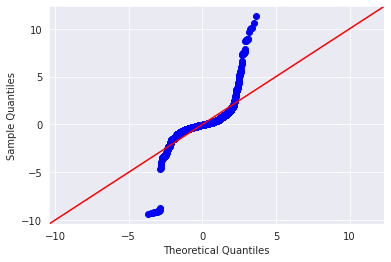

In [51]:
# Your code here - Check that the residuals are normally distributed
sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', 
                   fit= True);


    Wowza - not at all

## Check Homoscedasticity Assumption

Check whether the model's errors are indeed homoscedastic or if they violate this principle and display heteroscedasticity.

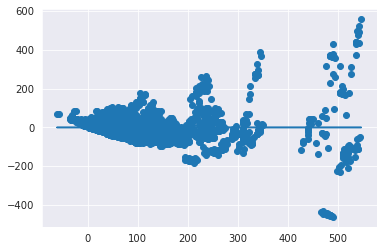

In [53]:
# Your code here - Check that the residuals are homoscedastic
plt.scatter(model.predict(X_train), model.resid)
plt.plot(model.predict(X_train), [0 for i in range(len(X_train))])

> **Comment:** This displays a fairly pronounced 'funnel' shape: errors appear to increase as the `list_price` increases. This doesn't bode well for our model. Subsetting the data to remove outliers and confining the model to this restricted domain may be necessary. A log transformation or something equivalent may also be appropriate.

## Make Additional Refinements

From here, make additional refinements to your model based on the above analysis. As you progress, continue to go back and check the assumptions for the updated model. Be sure to attempt at least two additional model refinements.

> **Comment:** Based on the above plots, it seems as though outliers are having a substantial impact on the model. As such, removing outliers may be appropriate. Investigating the impact of a log transformation is also worthwhile.

In [54]:
# Your code here - Check for outliers
X.columns

Index(['piece_count', 'num_reviews', 'play_star_rating', 'star_rating',
       'val_star_rating', 'ages_10_', 'ages_10-14', 'ages_10-16', 'ages_10-21',
       'ages_11-16',
       ...
       'country_NZ', 'country_PL', 'country_PT', 'country_US',
       'review_difficulty_Average', 'review_difficulty_Challenging',
       'review_difficulty_Easy', 'review_difficulty_Very_Challenging',
       'review_difficulty_Very_Easy', 'review_difficulty_unknown'],
      dtype='object', length=102)

In [64]:
def outlier_check(x):
    '''Input: Pandas Series
    Output: Prints information for identifying outliers'''
    
    print(x.name)
    for i in range(90, 99):
        print(f"{i/100} percentile: {X['num_reviews'].quantile(q=i/100)}")

        print("3 std above mean")
        print(X['num_reviews'].mean() + X['num_reviews'].std() * 3)
        print('--------------')

cols= ['piece_count', 'num_reviews', 'play_star_rating']
for col in cols:
    outlier_check(X[col])

piece_count
0.9 percentile: 0.5789616607500658
3 std above mean
3.0000000000000306
--------------
0.91 percentile: 0.6627451532062419
3 std above mean
3.0000000000000306
--------------
0.92 percentile: 0.8582399689373196
3 std above mean
3.0000000000000306
--------------
0.93 percentile: 0.9978791230309464
3 std above mean
3.0000000000000306
--------------
0.94 percentile: 1.2335900151408508
3 std above mean
3.0000000000000306
--------------
0.95 percentile: 1.5285079085867288
3 std above mean
3.0000000000000306
--------------
0.96 percentile: 1.8915697092301589
3 std above mean
3.0000000000000306
--------------
0.97 percentile: 2.0870645249612365
3 std above mean
3.0000000000000306
--------------
0.98 percentile: 3.511383896716232
3 std above mean
3.0000000000000306
--------------
num_reviews
0.9 percentile: 0.5789616607500658
3 std above mean
3.0000000000000306
--------------
0.91 percentile: 0.6627451532062419
3 std above mean
3.0000000000000306
--------------
0.92 percentile: 0.858

In [69]:
# Your code here
# Remove extreme outliers
# Remove everything above 3
cols= ['num_reviews', 'play_star_rating']
print(len(X_train))
for col in cols:
    X_train = X_train[X_train[col] <= 3]
    y_train = y_train[y_train.index.isin(X_train.index)]
print(len(X_train))
# Rerun the model
model = sm.OLS(y_train, X_train).fit()
model.summary()


7957
7957


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             list_price   R-squared:                       0.721
Model:                            OLS   Adj. R-squared:                  0.718
Method:                 Least Squares   F-statistic:                     299.2
Date:                Mon, 04 Jan 2021   Prob (F-statistic):               0.00
Time:                        20:16:31   Log-Likelihood:                -41234.
No. Observations:                7957   AIC:                         8.261e+04
Df Residuals:                    7888   BIC:                         8.309e+04
Df Model:                          68                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
const                                               28.6021      1.887     15.159      0.000      24.903      32.301
num_reviews                                         15.1571      1.602      9.461      0.000      12.017      18.297
play_star_rating                                     8.6101      0.652     13.213      0.000       7.333       9.887
val_star_rating                                     -8.7427      0.618    -14.142      0.000      -9.954      -7.531
ages_10_                                           120.6959      6.537     18.463      0.000     107.881     133.511
ages_10-14                                         -20.2141     11.437     -1.767      0.077     -42.634       2.206
ages_10-16                                          65.2687      4.799     13.600      0.000      55.861      74.676
ages_10-21                                          33.3931      4.122      8.101      0.000      25.313      41.474
ages_11-16                                         151.2497      6.839     22.115      0.000     137.843     164.657
ages_12_                                           206.4094      8.615     23.959      0.000     189.522     223.297
ages_12-16                                         157.4424      8.805     17.881      0.000     140.182     174.703
ages_14_                                           214.9031      5.703     37.680      0.000     203.723     226.083
ages_16_                                           256.6072     11.505     22.304      0.000     234.054     279.160
ages_1½-3                                           -8.4950      3.851     -2.206      0.027     -16.043      -0.947
ages_2-5                                            15.5177      2.407      6.448      0.000      10.800      20.236
ages_4_                                           2.875e-13    2.8e-14     10.259      0.000    2.33e-13    3.42e-13
ages_5_                                            -12.6896      3.917     -3.240      0.001     -20.368      -5.011
ages_5-12                                          -45.3228      3.315    -13.670      0.000     -51.822     -38.824
ages_6_                                            -29.8637      7.195     -4.151      0.000     -43.967     -15.760
ages_6-12                                           -6.6454      2.286     -2.907      0.004     -11.126      -2.164
ages_7-12                                            1.7285      2.686      0.644      0.520      -3.537       6.994
ages_7-14                                           -3.4473      2.417     -1.426      0.154      -8.185       1.291
ages_8_                                             24.7701      5.360      4.622      0.000      14.264      35.276
ages_8-12                                

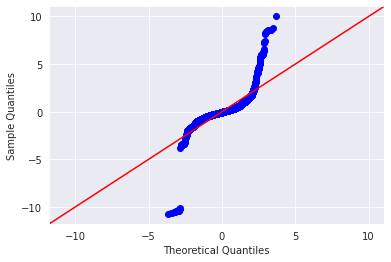

In [70]:
# Your code here - Check normality assumption

sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', 
                   fit= True);

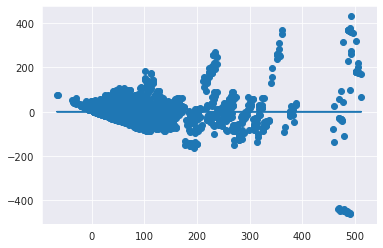

In [71]:
# Your code here - Check the Homoscedasticity Assumption

plt.scatter(model.predict(X_train), model.resid)
plt.plot(model.predict(X_train), [0 for i in range(len(X_train))])

In [ ]:
# Your code goes here

# Nope.. no improvement Hahaha

## Summary

Well done! As you can see, regression can be a challenging task that requires you to make decisions along the way, try alternative approaches, and make ongoing refinements. These choices depend on the context and specific use cases. 